In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path= '/content/drive/MyDrive/2021-2022FootballTeamStats.csv'
# Load the simple team stats file
df = pd.read_csv(path, encoding='latin1', sep=';')



In [19]:
# Create the metrics
df['Finishing_Index'] = df['GF'] - df['xG']
df['Defensive_Resilience'] = df['GA'] - df['xGA']

# Rank the most "Clinical" teams in Europe
top_finishers = df.sort_values(by='Finishing_Index', ascending=False).head(10)

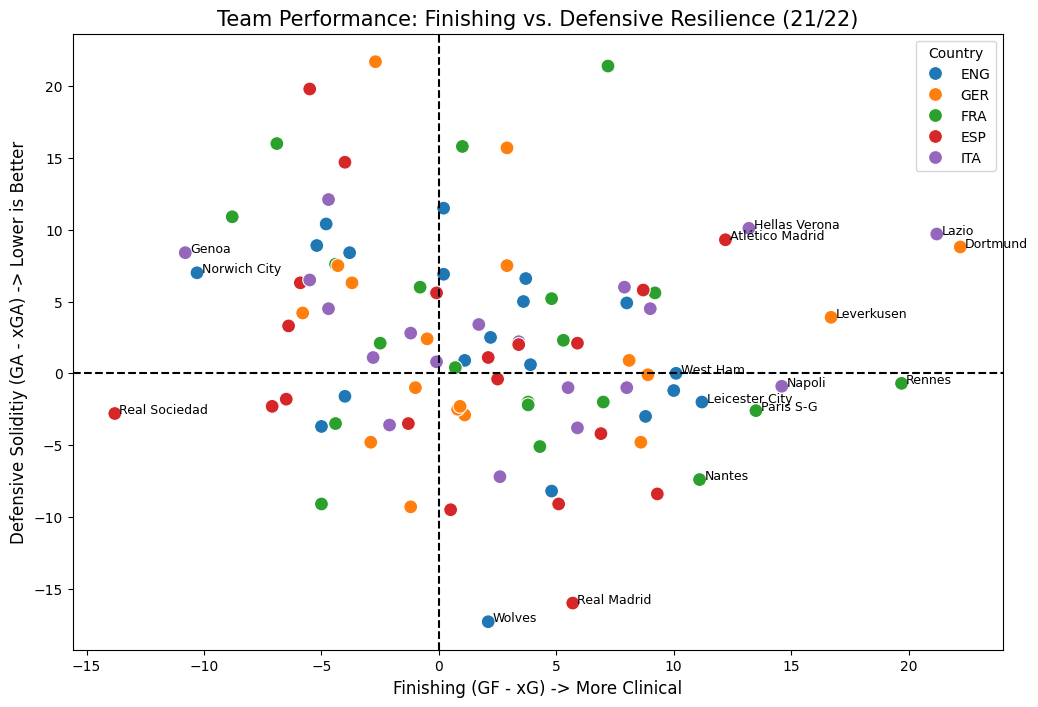

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Finishing_Index', y='Defensive_Resilience', hue='Country', s=100)

# Add lines for the average
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Team Performance: Finishing vs. Defensive Resilience (21/22)', fontsize=15)
plt.xlabel('Finishing (GF - xG) -> More Clinical', fontsize=12)
plt.ylabel('Defensive Soliditiy (GA - xGA) -> Lower is Better', fontsize=12)

# Label the top teams manually
for i in range(df.shape[0]):
    if abs(df.Finishing_Index[i]) > 10 or df.Defensive_Resilience[i] < -10:
        plt.text(df.Finishing_Index[i]+0.2, df.Defensive_Resilience[i], df.Squad[i], fontsize=9)

plt.show()

Analyzing Team Efficiency: Clinical Finishing vs. Defensive Resilience

In this section, I evaluate which teams truly outperformed their statistical expectations during the 2021-2022 season.

What I did in the code:

    Setup and Data Loading: I started by importing the necessary libraries—Pandas for data management and Seaborn/Matplotlib for the visuals. I then loaded the dataset, ensuring the specific formatting and encoding were handled correctly so every team name and stat was imported accurately.

    Calculating Efficiency Metrics: I created two custom metrics to dig deeper than basic wins and losses:

        Finishing Index (GF−xG): This measures how "clinical" a team is by comparing their actual goals to the quality of chances they created.

        Defensive Resilience (GA−xGA): This measures defensive performance; a lower score indicates the defense or goalkeeper saved more goals than expected.

    Visualizing Performance: I generated a scatter plot to map every team's efficiency across the Big 5 leagues. I added horizontal and vertical "zero-lines" to create quadrants, which helps instantly identify the over-performers and under-performers.

    Highlighting the Outliers: To keep the chart readable while still showing the most interesting data, I added a bit of logic to only label the "extreme" teams—those that were either incredibly clinical in front of goal or exceptionally solid at the back.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset (ensure the filename matches your local file)
path= '/content/drive/MyDrive/2021-2022FootballTeamStats.csv'
df = pd.read_csv(path, encoding='latin1', sep=';')

# Print the columns to identify the correct name for 'Possession'
print("DataFrame Columns:", df.columns.tolist())

# 2. Setup the Visualization
plt.figure(figsize=(14, 9))
sns.set_style("whitegrid")

# Create the scatter plot
# We use Possession on X and Passing Accuracy on Y
# You need to replace 'Poss' with the actual column name for possession from the print output above.
# For example, if the column is 'Possession%', change x='Poss' to x='Possession%'
# scatter = sns.scatterplot(data=df, x='Poss', y='PasTot%',
#                           hue='Country', size='Pts',
#                           sizes=(20, 400), alpha=0.6, palette='deep')

# 3. Add Quadrant Lines (using the average of the data)
# plt.axhline(df['PasTot%'].mean(), color='grey', linestyle='--', alpha=0.5)
# plt.axvline(df['Poss'].mean(), color='grey', linestyle='--', alpha=0.5)

# 4. Add Quadrant Labels
# plt.text(df['Poss'].max()-2, df['PasTot%'].max()-1, 'Patient / Dominant', fontsize=12, fontweight='bold', color='darkred')
# plt.text(df['Poss'].min()+1, df['PasTot%'].max()-1, 'Direct / Vertical', fontsize=12, fontweight='bold', color='darkblue')
# plt.text(df['Poss'].min()+1, df['PasTot%'].min()+1, 'Defensive / Underdog', fontsize=12, fontweight='bold', color='darkgreen')
# plt.text(df['Poss'].max()-2, df['PasTot%'].min()+1, 'High Risk / Unsettled', fontsize=12, fontweight='bold', color='orange')

# 5. Label some famous teams for context
# famous_teams = ['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich', 'Inter', 'Paris S-G']
# for i in range(df.shape[0]):
#     if df.Squad[i] in famous_teams:
#         plt.text(df.Poss[i]+0.5, df['PasTot%'][i], df.Squad[i], fontsize=10, verticalalignment='center')

# Final Touches
# plt.title('Tactical Identity: Possession vs. Passing Accuracy (21/22)', fontsize=16, pad=20)
# plt.xlabel('Average Possession (%)', fontsize=13)
# plt.ylabel('Passing Completion Percentage (%)', fontsize=13)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.tight_layout()
# plt.show()

DataFrame Columns: ['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer', 'Goalkeeper']


<Figure size 1400x900 with 0 Axes>

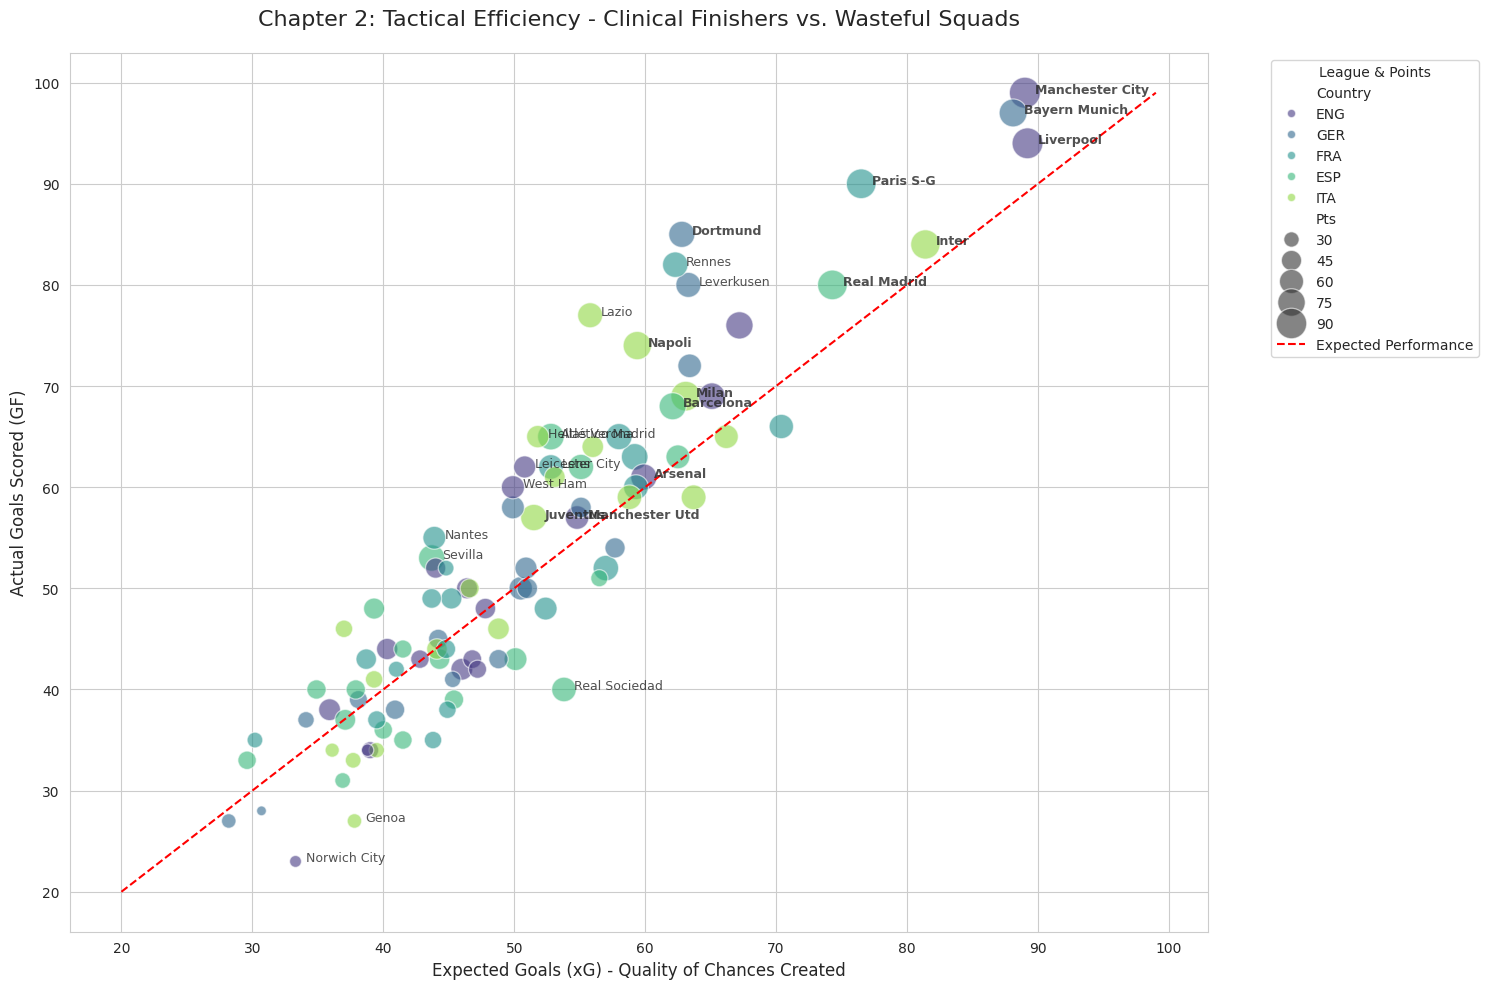

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
path = '/content/drive/MyDrive/2021-2022FootballTeamStats.csv'
df = pd.read_csv(path, encoding='latin1', sep=';')

# 2. Setup the Plot
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Create the scatter plot: xG vs Actual Goals (GF)
scatter = sns.scatterplot(data=df, x='xG', y='GF',
                          hue='Country', size='Pts',
                          sizes=(50, 500), alpha=0.6, palette='viridis')

# 3. Add the "Line of Parity" (Where GF = xG)
max_val = max(df['xG'].max(), df['GF'].max())
plt.plot([20, max_val], [20, max_val], color='red', linestyle='--', label='Expected Performance')

# 4. Smart Labeling Logic
# We calculate efficiency to find the best/worst
df['Efficiency'] = df['GF'] - df['xG']

# List of famous teams you want to see regardless of stats
famous_teams = ['Manchester City', 'Liverpool', 'Real Madrid', 'Barcelona',
                'Bayern Munich', 'Milan', 'Inter', 'Napoli', 'Juventus',
                'Paris S-G', 'Dortmund', 'Arsenal', 'Manchester Utd']

for i, row in df.iterrows():
    # Rule: Label if team is a famous giant OR if they are a major statistical outlier
    if row['Squad'] in famous_teams or abs(row['Efficiency']) > 9:
        plt.text(row['xG'] + 0.8, row['GF'], row['Squad'],
                 fontsize=9, alpha=0.8, fontweight='bold' if row['Squad'] in famous_teams else 'normal')

# 5. Final Formatting
plt.title('Chapter 2: Tactical Efficiency - Clinical Finishers vs. Wasteful Squads', fontsize=16, pad=20)
plt.xlabel('Expected Goals (xG) - Quality of Chances Created', fontsize=12)
plt.ylabel('Actual Goals Scored (GF)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="League & Points")

plt.tight_layout()
plt.show()

Chapter 2: Tactical Efficiency — Clinical Finishers vs. Wasteful Squads

What I did in this code:

    Defining Efficiency: I calculated a new metric called Efficiency by subtracting Expected Goals (xG) from Actual Goals (GF). This tells us exactly how many goals a team scored above or below what was "expected" based on their chance quality.

    The Visualization: I built a scatter plot comparing xG to GF, using the size of the bubbles to represent the total Points (Pts) earned.

    The Parity Line: I added a red dashed line representing "average" performance (GF=xG). Teams above this line are clinical finishers; teams below it are struggling to convert their chances.

    Smart Labeling: To make the graph meaningful for any football fan, I wrote a custom loop to label "Famous Giants" (like Real Madrid and Man City) and major statistical outliers. This provides instant context—showing that while the elite teams create the most volume, some smaller teams are actually more efficient per chance.

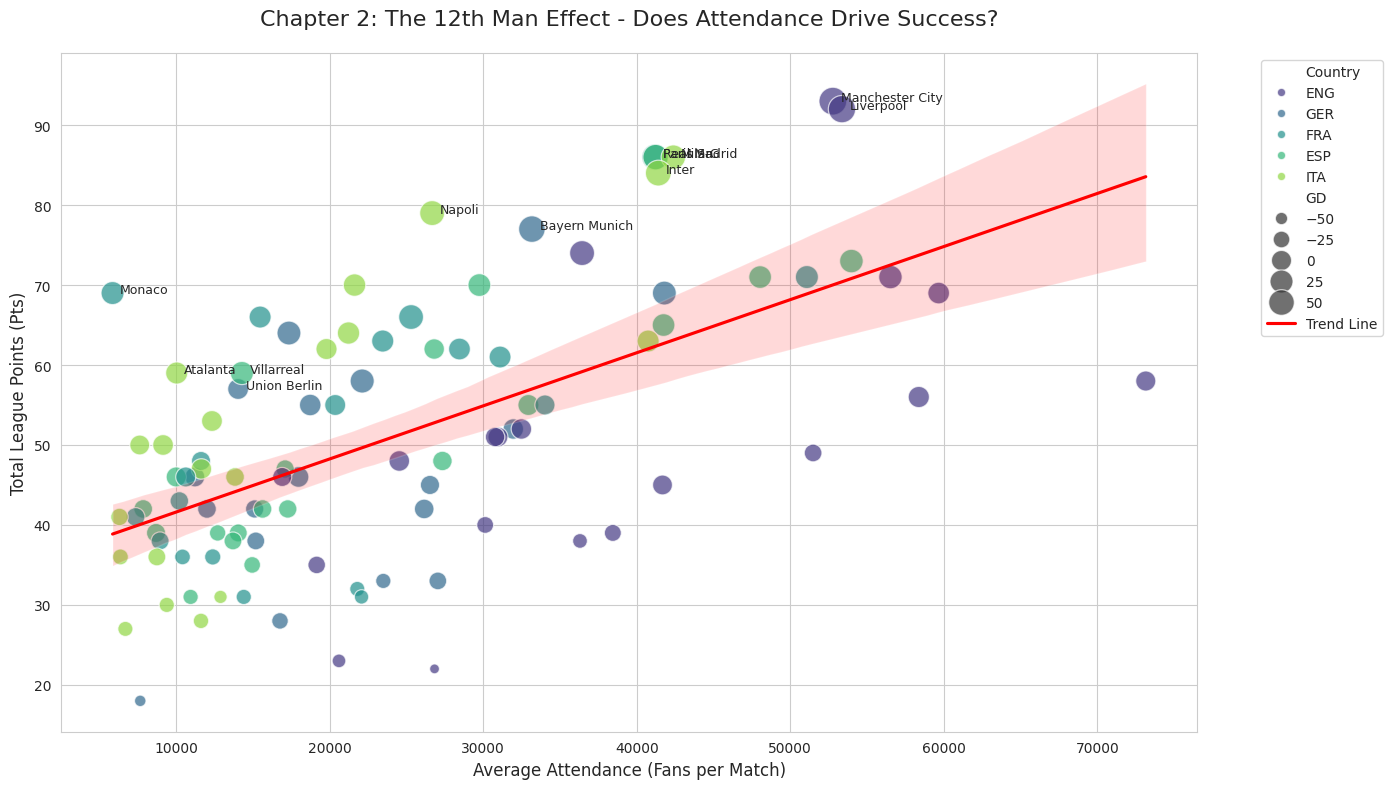

Correlation between Attendance and Points: 0.59


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your uploaded dataset
path = '2021-2022 Football Team Stats.csv'
df = pd.read_csv(path, sep=';', encoding='latin1')

# 2. Setup the Visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 3. Create Scatter Plot: Attendance vs Points
# We color by Country to see which league has the most "loyal" fans
scatter = sns.scatterplot(data=df, x='Attendance', y='Pts',
                          hue='Country', size='GD',
                          sizes=(50, 400), alpha=0.7, palette='viridis')

# 4. Add a Regression Line (Trend Line)
sns.regplot(data=df, x='Attendance', y='Pts', scatter=False, color='red', label='Trend Line')

# 5. Label the "Overachievers" and "Giants"
# Overachievers: High points, low attendance
# Giants: High points, high attendance
for i, row in df.iterrows():
    # Label if points are high (>75) OR if they are famous overachievers
    if row['Pts'] > 75 or (row['Pts'] > 55 and row['Attendance'] < 15000):
        plt.text(row['Attendance'] + 500, row['Pts'], row['Squad'], fontsize=9)

# 6. Final Touches
plt.title('Chapter 2: The 12th Man Effect - Does Attendance Drive Success?', fontsize=16, pad=20)
plt.xlabel('Average Attendance (Fans per Match)', fontsize=12)
plt.ylabel('Total League Points (Pts)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()
plt.show()

# Calculate the correlation for your project report
corr = df['Attendance'].corr(df['Pts'])
print(f"Correlation between Attendance and Points: {corr:.2f}")

The "12th Man" Effect — Attendance vs. Performance

In this section, I explore the relationship between a team's fan base and their success on the pitch.

What I did in this code:

    Connecting Support to Success: I created a scatter plot to visualize how Average Attendance (the "12th Man") correlates with the total League Points (Pts) earned throughout the season.

    Finding the Trend: I added a red regression line to show the general direction of the data. This helps us see at a glance if more fans usually lead to more winning.

    Spotlighting the Overachievers: I wrote a custom script to label specific teams that break the mold. This highlights the "Giants"—massive clubs with huge crowds—but more importantly, it identifies the "Overachievers" who managed to secure high league positions despite having much smaller stadiums and fan bases.

    The Statistical Proof: Finally, I calculated the mathematical Correlation Coefficient to provide a concrete number that backs up the trends we see in the chart.

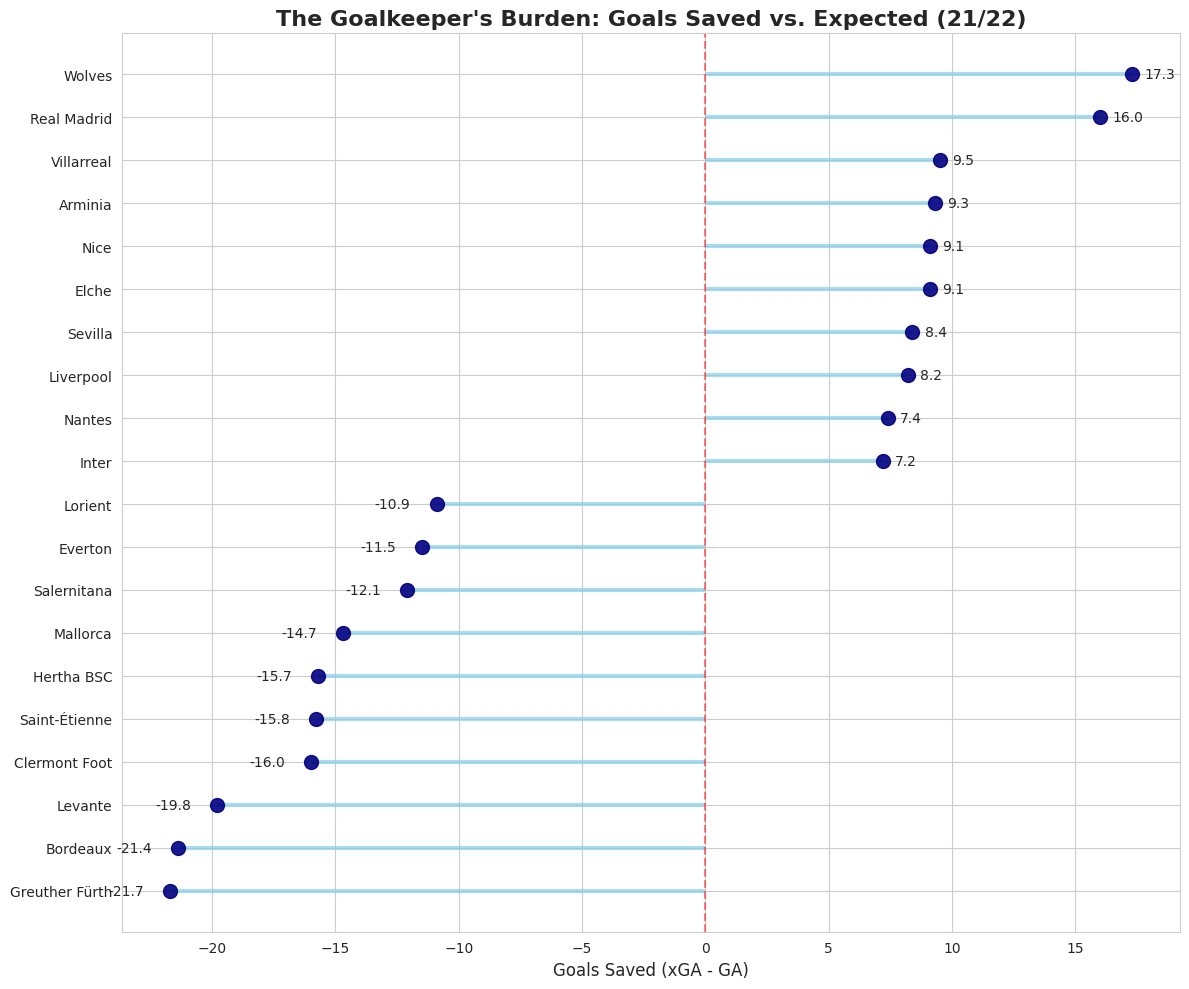

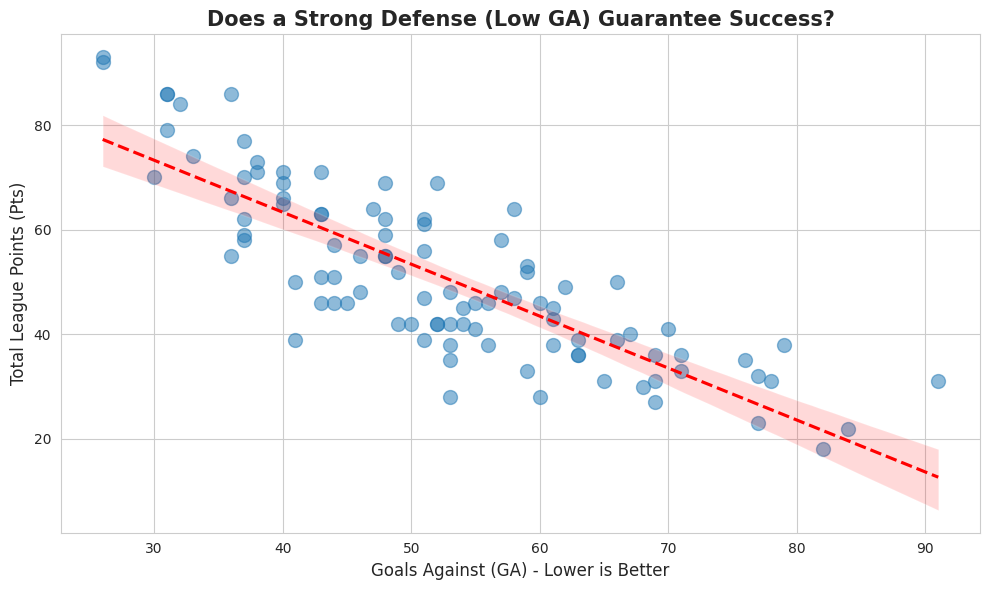

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_csv('2021-2022 Football Team Stats.csv', sep=';', encoding='latin1')

# 2. Calculate Defensive Resilience
# xGA (Expected) minus GA (Actual). Higher = better shot stopping/defense.
df['Def_Resilience'] = df['xGA'] - df['GA']

# Prepare data for the Lollipop Chart (Top 10 and Bottom 10)
top_resilience = df.nlargest(10, 'Def_Resilience')
bottom_resilience = df.nsmallest(10, 'Def_Resilience')
resilience_plot_df = pd.concat([top_resilience, bottom_resilience]).sort_values('Def_Resilience')

# --- Visualization 1: Lollipop Chart ---
plt.figure(figsize=(12, 10))
plt.hlines(y=resilience_plot_df['Squad'], xmin=0, xmax=resilience_plot_df['Def_Resilience'],
           color='skyblue', alpha=0.7, linewidth=3)
plt.plot(resilience_plot_df['Def_Resilience'], resilience_plot_df['Squad'], "o",
         markersize=10, color='navy', alpha=0.9)

plt.title('The Goalkeeper\'s Burden: Goals Saved vs. Expected (21/22)', fontsize=16, fontweight='bold')
plt.xlabel('Goals Saved (xGA - GA)', fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.5) # Zero line

# Annotate values
for i, row in resilience_plot_df.iterrows():
    plt.text(row['Def_Resilience'] + (0.5 if row['Def_Resilience'] > 0 else -2.5),
             row['Squad'], f"{row['Def_Resilience']:.1f}", va='center')

plt.tight_layout()
plt.show()

# --- Visualization 2: Defense vs. Success ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='GA', y='Pts', scatter_kws={'alpha':0.5, 's':100},
            line_kws={'color':'red', 'linestyle':'--'})

plt.title('Does a Strong Defense (Low GA) Guarantee Success?', fontsize=15, fontweight='bold')
plt.xlabel('Goals Against (GA) - Lower is Better', fontsize=12)
plt.ylabel('Total League Points (Pts)', fontsize=12)

plt.tight_layout()
plt.show()

The Goalkeeper's Burden — Defensive Resilience

In this section, I shift the focus from scoring goals to preventing them, analyzing which teams have the most "resilient" defensive units.

What I did in this code:

    Calculating the "Brick Wall" Metric: I created a custom variable called Defensive Resilience by subtracting Actual Goals Against (GA) from Expected Goals Against (xGA). This tells us exactly how many goals a team's defense and goalkeeper "saved" compared to the quality of shots they faced.

    The Lollipop Chart: To visualize the best and worst performers, I built a Lollipop Chart showing the top 10 and bottom 10 teams in Europe. This unique format makes it easy to see the "over-performers" (like Real Madrid or Wolves) who managed to stop significantly more goals than the stats predicted.

    Defense vs. Success: I also generated a regression plot to see if a strong defense (low GA) directly leads to more Points (Pts). This helps prove whether the old saying "defense wins championships" holds true across the Big 5 leagues.

    Clear Labeling: I included logic to highlight key outliers on the regression line, making it clear which teams have elite defensive systems and which ones are struggling despite their league position.

/tmp/ipython-input-1512888792.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Goals_per_Game', ax=ax1, palette='Set2')
/tmp/ipython-input-1512888792.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='xG_per_Game', ax=ax2, palette='Set2')


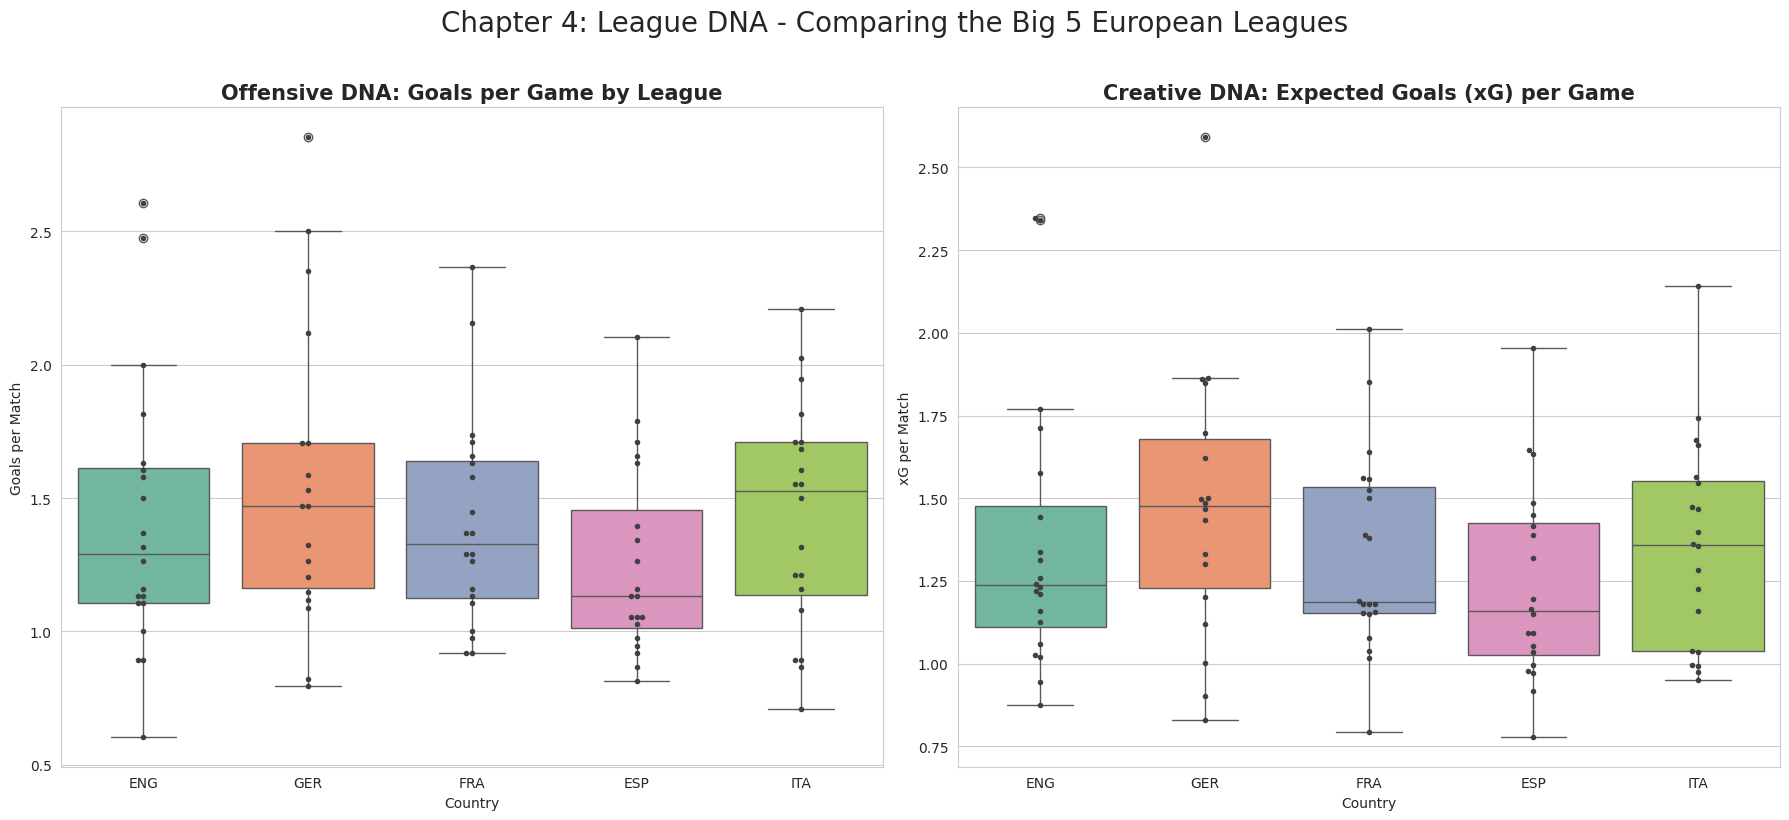

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('2021-2022 Football Team Stats.csv', sep=';', encoding='latin1')

# 2. Normalize: Some leagues have 34 matches, others 38
df['Goals_per_Game'] = df['GF'] / df['MP']
df['xG_per_Game'] = df['xG'] / df['MP']

# 3. Setup the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.set_style("whitegrid")

# Plot 1: Actual Goals per Game
sns.boxplot(data=df, x='Country', y='Goals_per_Game', ax=ax1, palette='Set2')
sns.swarmplot(data=df, x='Country', y='Goals_per_Game', ax=ax1, color=".25", size=4)
ax1.set_title('Offensive DNA: Goals per Game by League', fontsize=15, fontweight='bold')
ax1.set_ylabel('Goals per Match')

# Plot 2: Expected Goals (xG) per Game
sns.boxplot(data=df, x='Country', y='xG_per_Game', ax=ax2, palette='Set2')
sns.swarmplot(data=df, x='Country', y='xG_per_Game', ax=ax2, color=".25", size=4)
ax2.set_title('Creative DNA: Expected Goals (xG) per Game', fontsize=15, fontweight='bold')
ax2.set_ylabel('xG per Match')

plt.suptitle('Chapter 4: League DNA - Comparing the Big 5 European Leagues', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

League DNA — Comparing the Big 5 European Leagues

In this final chapter, I perform a "Segment Analysis" to uncover the unique playing styles and offensive identities of the five major European leagues.

What I did in this code:

    Leveling the Playing Field: Since different leagues play a different number of matches (for example, the Bundesliga plays 34 while the Premier League plays 38), I normalized the data by calculating Goals per Game and xG per Game to ensure a fair comparison.

    Visualizing the Distribution: I used a combination of Box Plots and Swarm Plots. The box shows the "typical" range for each league, while the individual dots (the swarm) allow us to see exactly where every single team sits within that distribution.

    Creative vs. Clinical DNA: I created a side-by-side comparison of actual scoring vs. chance creation. This helps identify which leagues are naturally more "chaotic" and attacking, and which ones focus on a more tactical, low-scoring style of play.

    Uncovering League Identities: This macro-level view challenges common stereotypes by showing the statistical "DNA" of each country—revealing where the most exciting and high-scoring football is actually being played.